## important Packages

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

**Read the CSV file**

In [4]:
data = pd.read_csv('201902-fordgobike-tripdata.csv')
data.head(10)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes
5,1793,2019-02-28 23:49:58.6320,2019-03-01 00:19:51.7600,93.0,4th St at Mission Bay Blvd S,37.770407,-122.391198,323.0,Broadway at Kearny,37.798014,-122.405950,5200,Subscriber,1959.0,Male,No
6,1147,2019-02-28 23:55:35.1040,2019-03-01 00:14:42.5880,300.0,Palm St at Willow St,37.317298,-121.884995,312.0,San Jose Diridon Station,37.329732,-121.901782,3803,Subscriber,1983.0,Female,No
7,1615,2019-02-28 23:41:06.7660,2019-03-01 00:08:02.7560,10.0,Washington St at Kearny St,37.795393,-122.404770,127.0,Valencia St at 21st St,37.756708,-122.421025,6329,Subscriber,1989.0,Male,No
8,1570,2019-02-28 23:41:48.7900,2019-03-01 00:07:59.7150,10.0,Washington St at Kearny St,37.795393,-122.404770,127.0,Valencia St at 21st St,37.756708,-122.421025,6548,Subscriber,1988.0,Other,No
9,1049,2019-02-28 23:49:47.6990,2019-03-01 00:07:17.0250,19.0,Post St at Kearny St,37.788975,-122.403452,121.0,Mission Playground,37.759210,-122.421339,6488,Subscriber,1992.0,Male,No


### Shape od data 

In [19]:
data.shape

(183412, 16)

### Type of each variable in Data

In [20]:
data.dtypes

duration_sec                 int64
start_time                  object
end_time                    object
start_station_id           float64
start_station_name          object
start_station_latitude     float64
start_station_longitude    float64
end_station_id             float64
end_station_name            object
end_station_latitude       float64
end_station_longitude      float64
bike_id                      int64
user_type                   object
member_birth_year          float64
member_gender               object
bike_share_for_all_trip     object
dtype: object

our data consist of 183,412 samples for fordgobike in the data with 16 features (duration_sec, start_time, end_time, start_station_id, start_station_name, start_station_latitude, start_station_longitude, end_station_id, end_station_name, end_station_latitude ,end_station_longitude, bike_id, user_type, member_birth_year, member_gender, bike_share_for_all_trip). Most variables are 9 numerical, and others are 2 datetime, 4 object type and 1 is boolean type

## Counting Missing Data

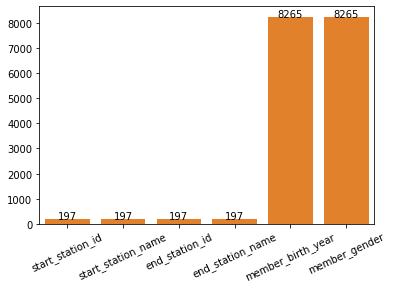

In [38]:
columns= ['start_station_id','start_station_name',
          'end_station_id',
          'end_station_name','member_birth_year',
          'member_gender']
na_counts= data[columns].isnull().sum()

sb.barplot(na_counts.index, na_counts,color= sb.color_palette()[1])

plt.xticks(rotation=25) 

for i in range (na_counts.shape[0]):
    count = na_counts[i]
    plt.text(i, count+300, count, ha = 'center', va='top')

this data contanis on missing values about 8265 in member_birth_year and member_gender ,about 197 missing values in each start_station_id,start_station_name,end_station_id and end_station_name

### **UniVariate Visualization**

we want to know the distribution of each featur in our dataset

**Distribution of user_type feature**

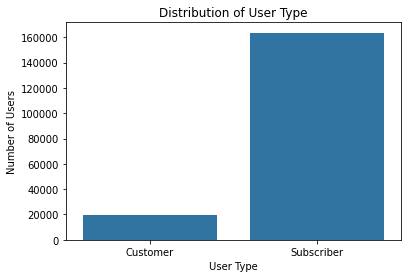

In [44]:
plt.figure(figsize=[7,4])
color= sb.color_palette()[0]
sb.countplot(data['user_type'],color=color)
plt.title('Distribution of User Type')
plt.xlabel('User Type')
plt.ylabel('Number of Users');

**Distribution of member_gender feature**

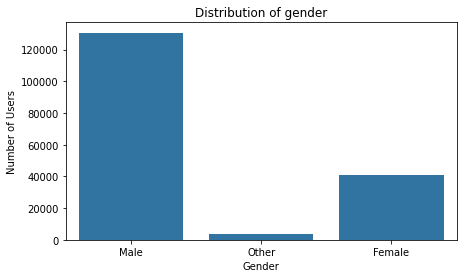

In [46]:
plt.figure(figsize=[7,4])
color= sb.color_palette()[0]
sb.countplot(data['member_gender'],color=color)
plt.title('Distribution of gender')
plt.xlabel('Gender')
plt.ylabel('Number of Users');

## Distribution of  User Ages 

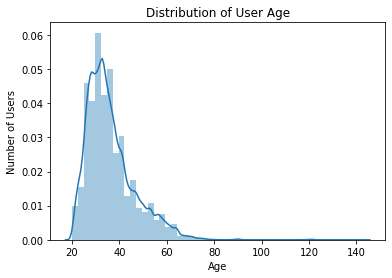

In [56]:
data['member_birth_year']= 2021 - data['member_birth_year']
color= sb.color_palette()[0]
sb.distplot(data['member_birth_year']);
#data['member_birth_year']
plt.title('Distribution of User Age')
plt.xlabel('Age')
plt.ylabel('Number of Users')
plt.show()


ages of user between 20 to 80 year old and the distribution is more concentrated between 20 to 40 years old.

### **Bivariate Exploration**

member_birth_year && duration_sec

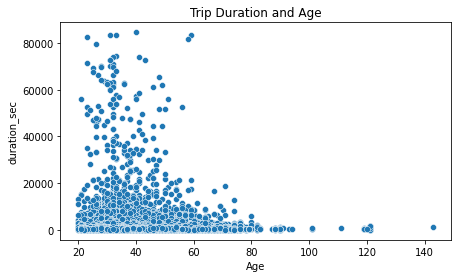

In [70]:
plt.figure(figsize=(7,4))
sb.scatterplot(data = data, x = 'member_birth_year', y = 'duration_sec');
plt.xlabel('Age')
plt.ylabel('duration_sec')
plt.title('Trip Duration and Age');

**gender && duration**

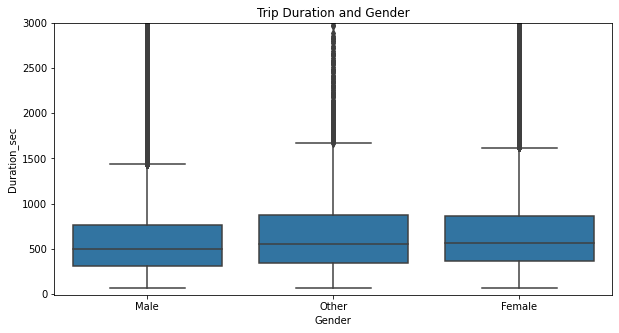

In [76]:
plt.figure(figsize = [10, 5])
base_color = sb.color_palette()[0]
sb.boxplot(data = data, x = 'member_gender', y = 'duration_sec', color = base_color)
plt.ylim([-10, 3000])
plt.title('Trip Duration and Gender')
plt.xlabel('Gender')
plt.ylabel('Duration_sec')
plt.show()

**we can see that higher percentage of female and other rides longer trips then males although number of male riders are very high then other and female**

**user_type && duration**

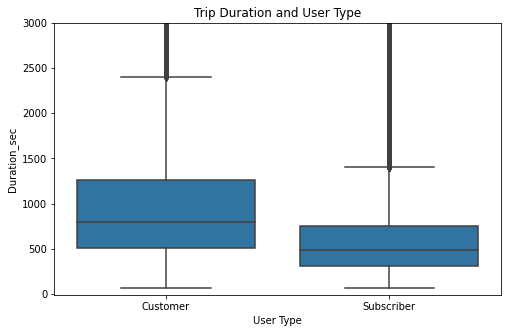

In [98]:
plt.figure(figsize = [8, 5])
base_color = sb.color_palette()[0]
sb.boxplot(data = data, x = 'user_type', y = 'duration_sec', color = base_color)
plt.ylim([-10, 3000])
plt.title('Trip Duration and User Type')
plt.xlabel('User Type')
plt.ylabel('Duration_sec')
plt.show()

we can see that higher percentage of customer rides longer trips then subscriber although number of subscriber riders are very high then customer

## Multivariate Exploration

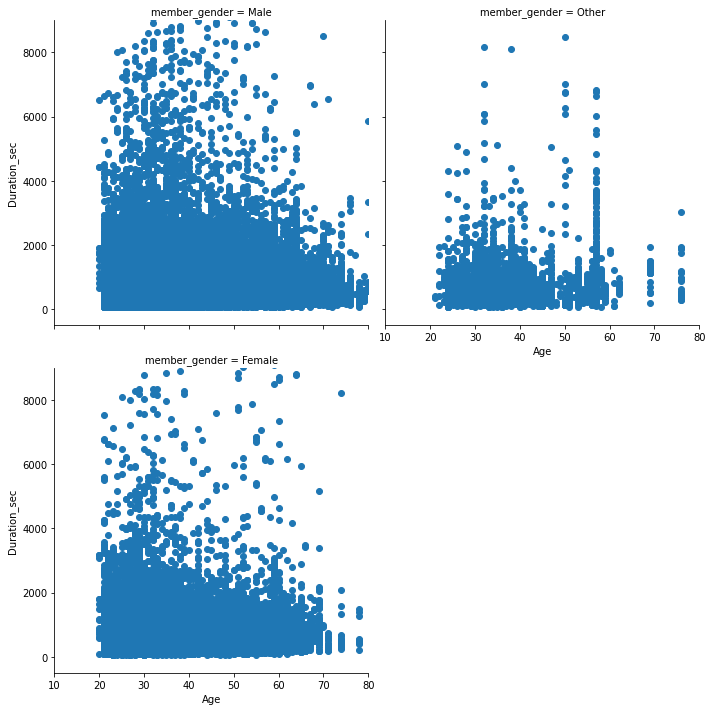

In [88]:
gender = sb.FacetGrid(data = data, col = 'member_gender', col_wrap = 2, size = 5,
                 xlim = [10, 80], ylim = [-500, 9000])
gender.map(plt.scatter, 'member_birth_year', 'duration_sec', alpha= 1)


gender.set_xlabels('Age')
gender.set_ylabels('Duration_sec')
plt.show()

**Age && duration && gender**

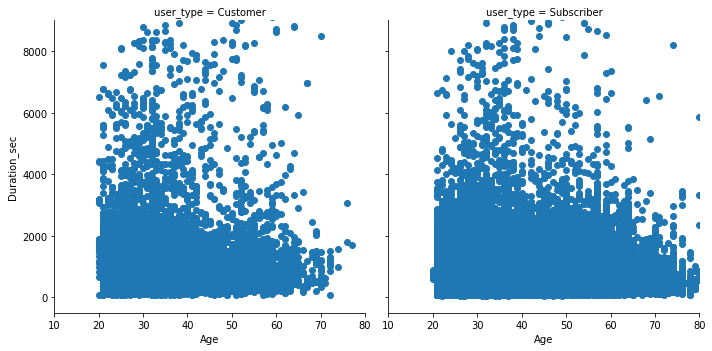

In [95]:
user_type = sb.FacetGrid(data = data, col = 'user_type', col_wrap = 2, size = 5,
                 xlim = [10, 80], ylim = [-500, 9000])
user_type.map(plt.scatter, 'member_birth_year', 'duration_sec')

user_type.set_xlabels('Age')
user_type.set_ylabels('Duration_sec')
plt.show()

For the age, duration, and user type, both Customer and Subscriber are showing similar trends for age and trip duration, but for subscribers the trip duration is higher for older age